# Statisztika alapok: Normális eloszlás
A normális eloszlás egyike a legalapvetőbb statisztikai eloszlásoknak. Sok természetes jellemzőt lehetséges modellezni segítségével, mint:
- IQ eloszlása az embereknél
- Testmagasság eloszlása az embereknél

Mint alapvető eloszlás, a legtöbb statisztikához köthető csomag valamilyen formában tartalmazza a normális eloszlással való számítást, így a SciPy is tartalmazza. A következőkben egyrészt a csomag statisztikai használatában való bevezetést, illetve ehhez kapcsolódóan a vizualizációba nyújt betekintést.

Kezdjük először az alapvető könyvtárak importálásával, ehhez kapcsolódóan a statisztikai csomagok betöltését is:

In [1]:
# Numpy betöltése
import numpy as np
# Statisztikai függvények (normális eloszlás betöltése)
from scipy.stats import norm
# Vizualizációs könyvtár betöltése
import matplotlib.pyplot as plt

Ezután el kell készíteni azt az intervallumot, amin az eloszlásunk ábrázolásra kerül. Vegyünk egy egyenletes intervallumot -5 és 5 között, 200 egységre bontva (__linspace__).

In [2]:
steps = 200
x = np.linspace(-5, 5, steps)

Ezzel ezen a tartományon ábrázolható a normális eloszlás. Ehhez a normáleloszlás eloszlásfüggvényét használjuk a következő paraméterekkel:
- Várható érték haranggörbe maximum értékhelye, inutitívan: x-kooridnáta szerinti eltolás
- Szórásnégyzet: az sklearn a szórást várja szórásnégyzet helyett, intuitívan 

A következő eloszlásokat definiáljuk:
- Standard normál eloszlás N(0,1)
- Normál eloszlás: N(0, 2)
- Normál eloszlás: N(2, 0.5)
- Normál eloszlás: N(-2, 2)

In [3]:
dist_0 = norm.pdf(x)
dist_0_05 = norm.pdf(x, 0, np.sqrt(0.5))
dist_0_2 = norm.pdf(x, 0, np.sqrt(2))
dist_2_05 = norm.pdf(x, 2, np.sqrt(0.5))
dist_m2_2 = norm.pdf(x, -2, np.sqrt(2))

Ezután plottoljuk az egyes eloszlásfüggvényeket __matplotlib__ segítségével:

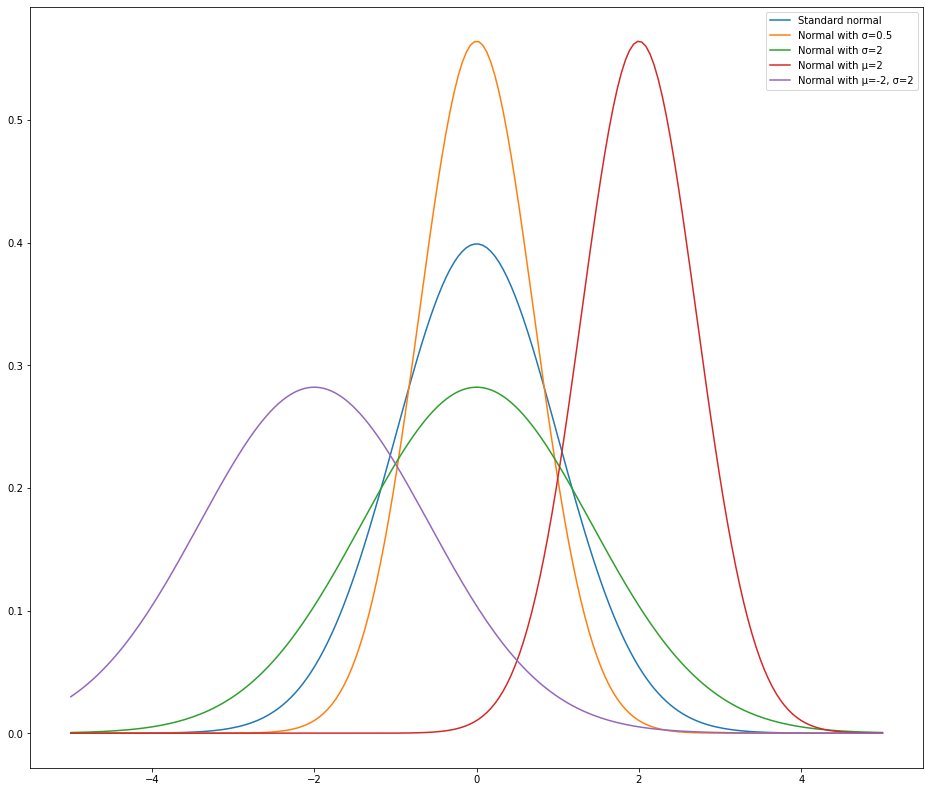

In [4]:
plt.figure(figsize=(16, 14))
plt.plot(x, dist_0, label="Standard normal")
plt.plot(x, dist_0_05, label="Normal with σ=0.5")
plt.plot(x, dist_0_2, label="Normal with σ=2")
plt.plot(x, dist_2_05, label="Normal with μ=2")
plt.plot(x, dist_m2_2, label="Normal with μ=-2, σ=2")
plt.legend()

## Binomiális approximáció Normál eloszlással

Nagyon nagy minták esetén (már n:=6 esetében is hasonló jellegű lesz!) a binomiális eloszlás közelíthető egy megfelelően paraméterezett normális eloszlással. Ennek bemutatásához importáljuk be a binomiális eloszlást a scipy csomagból:

In [5]:
from scipy.stats import binom

A normális eloszlást a kövektező paraméterezhetjük. Ha van egy binomiális eloszlásunk, amely:
$$X = B(n,p)$$
Akkor a közelítő normális eloszlás így paraméterezhető:
$$X_{aprx} = N(np, np(1-p))$$

Ennek bemutatásához vegyünk 1000 darab mintát a binomiális eloszlásunkból.

In [6]:
steps = 200
n = 100
p = 0.5
pts = 1000
r = binom.rvs(n, p, size=pts)

Ezután definiáljuk a közelítő normális eloszlást:

In [7]:
sigma = np.sqrt(n*p*(1-p))
x = np.linspace(norm.ppf(0.01, n*p, sigma), norm.ppf(0.99, n*p, sigma), steps)
p = norm.pdf(x, n*p, sigma)

A közelítés reprezetnálható a mintavételezés normalizált hisztogramjával és a normális eloszlás diagramjának plottolásával:

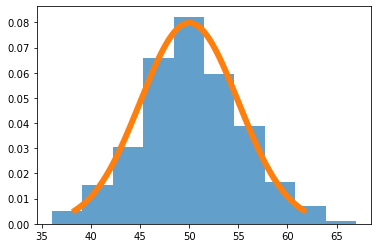

In [8]:
plt.hist(r, alpha=0.7, histtype='stepfilled', density=True)
plt.plot(x,p, linewidth=6)

## Empirikus szabály (68-95-99.7)

A normális eloszlás empirikus szabálya közismert a statisztikában. Ez felhasználható egy mintán való könnyű következtetésre. Esetünkben azért is érdekes, mivel a szabály bemutatásával a _matplotlib_ leggyakrabban használt függvényei használhatók. Ezt mutatja be az alábbi kódrészlet:

Text(-3.5, 0.1, '0.1%')

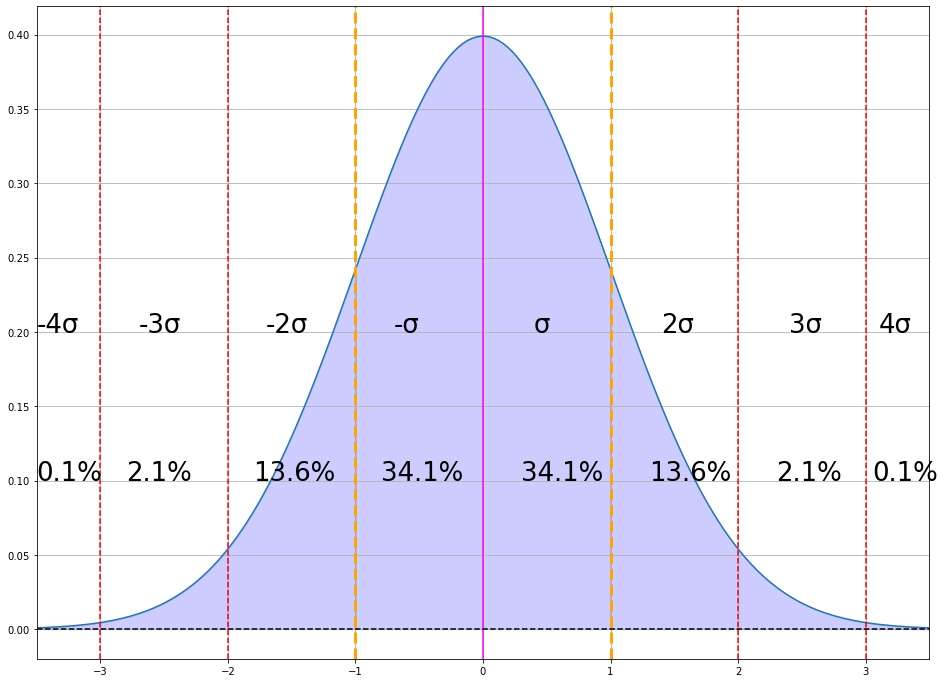

In [9]:
style = dict(size=26, color='black')
fig, ax = plt.subplots(figsize=(16, 12))

steps = 200
x = np.linspace(-3.5, 3.5, steps)
# Fill
plt.xlim((-3.5,3.5))
for i in range(9):
    x_loc = np.linspace(-4 + i, -3 + i, 50)
    plt.fill_between(x_loc, norm.pdf(x_loc), color='b', alpha=0.2)
# Annotate
sigma = 1
plt.grid()
dist_0 = norm.pdf(x, 0, 1)
plt.plot(x, dist_0)
plt.axvline(x=0, color='magenta', ls='-')
ax.text(0.4, 0.2, "σ", **style)
plt.axvline(x=1, color='orange', lw=3,ls='--')
ax.text(-0.7, 0.2, "-σ", **style)
plt.axvline(x=-1, color='orange', lw=3, ls='--')
ax.text(1.4, 0.2, "2σ", **style)
plt.axvline(x=2, color='r', ls='--')
ax.text(-1.7, 0.2, "-2σ", **style)
plt.axvline(x=-2, color='r', ls='--')
ax.text(2.4, 0.2, "3σ", **style)
plt.axvline(x=3, color='r', ls='--')
ax.text(-2.7, 0.2, "-3σ", **style)
plt.axvline(x=-3, color='r', ls='--')
plt.axhline(y=0, color='black', ls='--')
ax.text(-3.5, 0.2, "-4σ", **style)
ax.text(3.1, 0.2, "4σ", **style)
# Percentage annotation
ax.text(0.3, 0.1, "34.1%", **style)
ax.text(-0.8, 0.1, "34.1%", **style)
ax.text(1.3, 0.1, "13.6%", **style)
ax.text(-1.8, 0.1, "13.6%", **style)
ax.text(2.3, 0.1, "2.1%", **style)
ax.text(-2.8, 0.1, "2.1%", **style)
ax.text(3.05, 0.1, "0.1%", **style)
ax.text(-3.5, 0.1, "0.1%", **style)